<a href="https://colab.research.google.com/github/Sayma-sudo/senulationlab/blob/main/lab_7%2Ctask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Basic Statistics
Mean: 11.45
Population Variance: 6.35
Sample Variance: 6.68
Standard Deviation: 2.58

Explanation:
Population variance divides by number of data points (n).
Sample variance divides by (n-1), providing an unbiased estimate of variance for a population.
--------------------------------------------------


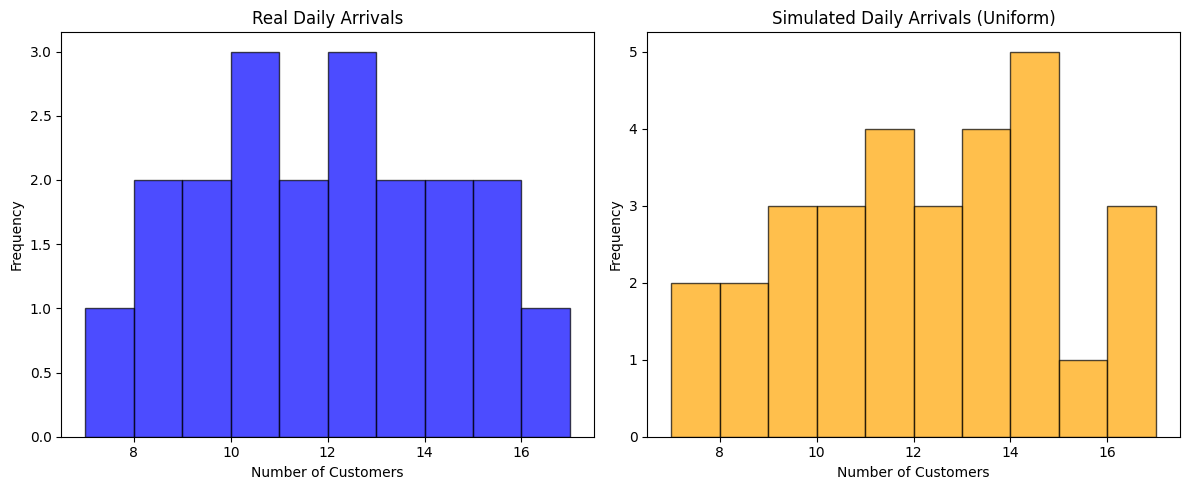

3. Monte Carlo Simulation
Estimated Probability (More than 15 customers): 0.1015
--------------------------------------------------
4. Hypothesis Testing
Hypothesized Mean: 10
t-statistic: 2.5087
p-value: 0.0213
Conclusion: Reject the null hypothesis: mean daily arrival is NOT equal to hypothesized mean.


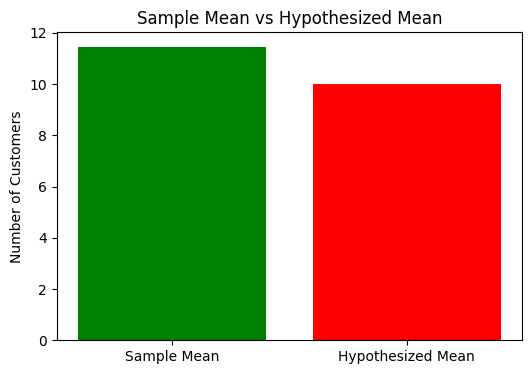

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# 1. Data Setup
arrivals = np.array([8, 12, 10, 15, 9, 13, 11, 14, 7, 16,
                     10, 12, 9, 15, 11, 13, 14, 8, 12, 10])

# --- 1. Basic Statistics ---
mean_arrivals = np.mean(arrivals)
pop_variance = np.var(arrivals)
sample_variance = np.var(arrivals, ddof=1)
std_dev = np.sqrt(sample_variance)

print("1. Basic Statistics")
print(f"Mean: {mean_arrivals:.2f}")
print(f"Population Variance: {pop_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print("\nExplanation:")
print("Population variance divides by number of data points (n).")
print("Sample variance divides by (n-1), providing an unbiased estimate of variance for a population.")
print("-" * 50)

# --- 2. Random Number Generation ---
min_val, max_val = arrivals.min(), arrivals.max()
np.random.seed(42)  # For reproducibility
simulated_arrivals = np.random.randint(min_val, max_val + 1, size=30)

# Plotting real and simulated data side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
bins = range(min_val, max_val + 2)

axs[0].hist(arrivals, bins=bins, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('Real Daily Arrivals')
axs[0].set_xlabel('Number of Customers')
axs[0].set_ylabel('Frequency')

axs[1].hist(simulated_arrivals, bins=bins, alpha=0.7, color='orange', edgecolor='black')
axs[1].set_title('Simulated Daily Arrivals (Uniform)')
axs[1].set_xlabel('Number of Customers')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- 3. Monte Carlo Simulation ---
samples = 100_000
mc_samples = np.random.randint(min_val, max_val + 1, size=samples)
prob_more_than_15 = np.mean(mc_samples > 15)

print("3. Monte Carlo Simulation")
print(f"Estimated Probability (More than 15 customers): {prob_more_than_15:.4f}")
print("-" * 50)

# --- 4. Hypothesis Testing ---
# Hypothesized mean from student ID = 1060
# last 3 digits: 060, 060 % 10 = 0, +10 = 10
hyp_mean = 10

t_stat, p_value = ttest_1samp(arrivals, hyp_mean)

print("4. Hypothesis Testing")
print(f"Hypothesized Mean: {hyp_mean}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    conclusion = "Reject the null hypothesis: mean daily arrival is NOT equal to hypothesized mean."
else:
    conclusion = "Fail to reject the null hypothesis: mean daily arrival is equal to hypothesized mean."

print("Conclusion:", conclusion)

# Visualization comparing sample mean and hypothesized mean
plt.figure(figsize=(6,4))
plt.bar(['Sample Mean', 'Hypothesized Mean'], [mean_arrivals, hyp_mean], color=['green', 'red'])
plt.title('Sample Mean vs Hypothesized Mean')
plt.ylabel('Number of Customers')
plt.show()
